<a href="https://colab.research.google.com/github/mcgoughlin/Python4ML/blob/main/week3/tutorial/MLWorkshop_Week3_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

preprocessing train vs test MLP as a set of nodes of equations using a pretrained model from the internet!

Hint at other loss functions, activations, and optimizers

MLP as extension of LR

Accuracy metrics in depth: ROC curve shows how acc. metrics change with the decision boundary. Talk about over vs underfitting.

Pull a pretrained model, perform MNIST handwritten digit classification.


# Coding Tutorial: Preprocessing and Data Augmentation, Neural Networks, and Evaluating ROC

Welcome to your third and final coding tutorial! 

In this tutorial, you will learn the final components of developing a neural network model. We will run through the importance of preprocessing, the architecture of the neural network, and we will end on how to evaluate the accuracy of neural networks using the accuracy metrics used in peer-reviewed papers.


# Outline
- [ 1 - Preprocessing](#1)
  - [ 1.1 - Normalisation](#1.1)
    - Exercise
  - [ 1.2 - Data Augmentation](#1.2)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Simplest Case - One Hidden Layer](#2.1)
  - [ 2.2 Deep Neural Networks](#2.2)
  - [ 2.3 Pretrained and Fine-Tuned Neural Networks](#2.3)
    - Exercise
- [ 3 - Evaluating Accuracy](#3)
  - [ 3.1 Sensitivity and Specificity](#3.1)
  - [ 3.2 ROC](#3.2)
  - [ 3.3 Final Exercise ](#3.3)


<a name="1"></a>
## 1 - Preprocessing
<a name="1.1"></a>
### 1.1 Normalisation

### The Guassian Distribution

The gaussian distribution, sometimes called the 'bell curve' or the 'Normal Distribution', is one of the most commonly observed distributions of random data in the world. It describes how high-probability outcomes tend to cluster around the centre of a distribution of data, with outliers becoming increasingly improbable the further they stray from the centre.

The gaussian distribution is a symmetrical probability density function defined by two values: the mean and standard deviation, which is usually written as sigma, $\sigma$. The mean value is, as you may have guessed the average value of the distribution - the standard deviation is the average absolute distance from the mean in the dsitribution. In other words, the mean dictates the centre of the distribution, and the standard deviation dictates how *spread out* the distribution is. A low standard deviation will generate a thin and pointy distribution, and a high standard deviation will generate a fat and flat distribution. **See an example of a Gaussian Distribution below**.

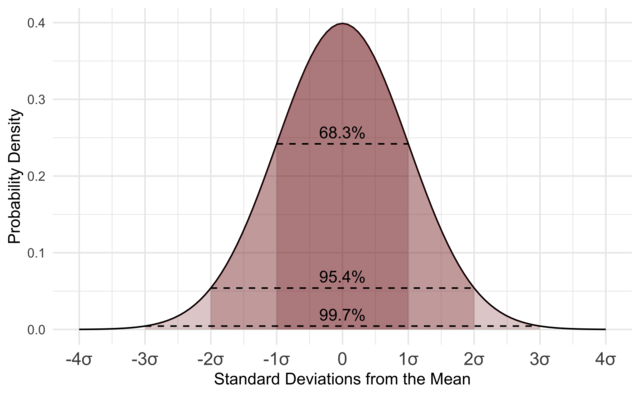

When we refer to a "Normal" distribution, we refer to a specific case of the Gaussian Distribution that has a mean of 0 and a standard deviation of 1. Any Gaussian distribution can be converted into a normal distribution - can be normalised - using the two metrics that define each; mean and standard deviation. Gaussian distributions are normalised using the following equation, where $N(x)$ is the normal distribution, $g(x)$ is any Gaussian distribution, $\overline{g(x)}$ is the mean of $g(x)$, and $\sigma_g$ is the standard deviation of $g(x)$:

\begin{align}
N(x) &= \frac{g(x) - \overline{g(x)}}{\sigma_g} \tag{1}
\end{align}

In words, this means:

1. We subtract the mean of the gaussian distribution from all points on the distribution. This aligns the distribution's new centre with 0.
2. We divide each point by the distributions average distance to the mean. This sets the average distance to 1.

Hence, our Gaussian becomes the special case of the Normal distribution, with a mean of 0 and a standard deviation of 1.

### Normalising Data

In machine learning, normalising input data is essential as it ensures the reliability of the machine learning process. 

Recall in Workshop 1; we said that we must give our model some initiated values of $m$ and $C$ in linear regression before learning begins. These are generally small values, between $-0.5< m, C < 0.5$. Similarly, we had to make some heuristics-led guesses of learning parameters like learning rate, batch size, and epochs. These parameters are unitless, so their absolute magnitude matters - learning can quickly diverge with inappropriately high learning parameter values, or be far too slow if they are inappropriately low.

Similarly, the rate of learning is dicated by the magnitude of our input data. In the case where the mean value of our data's mean output $\overline{Y}$ is >$1x10^{4}$, an initial guess $m, C$ of ~0.5 and a learning rate of 0.01 is likely to be inappropriate. Without normalising our input data, we would need to find the correct value of all the learning parameters in a trial-and-error fashion for our specific dataset - this is highly ineffiecient and unreliable in practise. Instead, if we normalise our input data beforehand, we can be sure that our learning parameters are roughly correct, which massively improves the consistency and effiency of our ML analyses.

### Normalisation in Code

In the last tutorial, I asked you to write a function that returned the modal value of a set of column data. In this tutorial, I am going to ask you to normalise each column in the same dataset! Feel free to refer to your code in the last tutorial for help. I will drop convert the species column into numbers like last time, to allow this column to be manipulated in numbers.

After normalising each column, print the new column's mean and standard deviation, to ensure its normality.

First, let us generate the dataset and convert species to numeric values: 

In [ ]:
import seaborn as sns
our_dataset = sns.load_dataset('iris').reset_index(drop=True) # loads the dataset from python module seaborn - included this code again for completeness

all_species = our_dataset['species'].unique() ## creates a list of all the species listed in our dataset
print(all_species)

conversion_dictionary = {} # creates an empty dictionary
index = 1
for id in all_species: ## loops over each species, create a dictionary entry with each species id and species id index value starting at 1
  conversion_dictionary[id] = index
  index = index+1 ## increase species id index value after every iterations

print(conversion_dictionary,"\n")

our_dataset['species'] = [conversion_dictionary[id] for id in our_dataset['species'].values] # convert the dataframe's species names to numbers
print(our_dataset.sample(5))

['setosa' 'versicolor' 'virginica']
{'setosa': 1, 'versicolor': 2, 'virginica': 3} 

     sepal_length  sepal_width  petal_length  petal_width  species
96            5.7          2.9           4.2          1.3        2
105           7.6          3.0           6.6          2.1        3
15            5.7          4.4           1.5          0.4        1
146           6.3          2.5           5.0          1.9        3
64            5.6          2.9           3.6          1.3        2


Next, normalisation! Assume each column's data follows a gaussian distribution, and apply equation (1) to convert each column into a normal distribution. I will perform this task on a single column, and plot the results, to help you:


Column sepal_length has a mean of 5.84 and a standard deviation of 0.83.
Normalised column sepal_length has a mean of -0.00 and a standard deviation of 0.00.



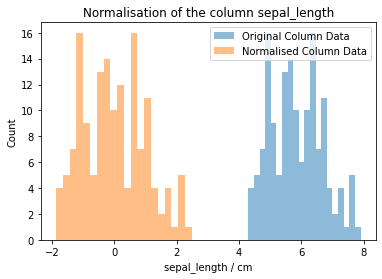

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1


In [ ]:
column_names = our_dataset.columns # generate a list of column names

### Normalising a single column from our_dataset

single_column_name = column_names[0] #this function selects the first column name in the list - you will loop through all the column names
single_column_data = our_dataset[single_column_name].copy() # select the column of data corresponding to our chosen column name
mean = single_column_data.mean() # calculate mean
stdev = single_column_data.std() # calculate stdev
print("Column {} has a mean of {:.2f} and a standard deviation of {:.2f}.".format(single_column_name, mean, stdev))

normalised = (single_column_data.copy() - mean) / stdev # normalise the data!
our_dataset[single_column_name] = normalised  # reassign normalised data in the place of our_dataset
n_mean = normalised.mean() # calculate mean of our new normalised data!
n_stdev = normalised.std() # calculate stdev of our new normalised  data!
print("Normalised column {} has a mean of {:.2f} and a standard deviation of {:.2f}.\n".format(single_column_name, n_mean.mean(), n_stdev.std()))


### Plot data distribution of first column before and after - DO NOT INCLUDE THIS IN YOUR FOR-LOOP CODE! This isn't necessary in our exercise :)
import matplotlib.pyplot as plt

plt.hist(single_column_data, 20, alpha=0.5, label='Original Column Data')
plt.hist(normalised, 20, alpha=0.5, label='Normalised Column Data')
plt.legend(loc='upper right')
plt.title("Normalisation of the column {}".format(single_column_name))
plt.xlabel("{} / cm".format(single_column_name))
plt.ylabel("Count")
plt.show()


### Reset data values
our_dataset[single_column_name] = single_column_data ## here I reset the value of the old data so that you don't get a free normalised column. Muahahahah


### WRITE YOUR CODE HERE

# for single_column_name in column_names:
#   ...


print(our_dataset.head())

<a name="1.2"></a>
### 1.2 Data Augmentation

Generally, when we develop machine learning classifiers, our goal is to have our model perform with a high generalised accuracy on new unseen data. However, when our model encounters new data with different properties to it's training data, the model can perform unreliably and fail. This problem can be thought of as a data collection and preparation problem - had we collected and prepared data for our machine learning model that had every possible variation that we could expect our model to see, then our model couldn't be 'surprised' by a new variation in model properties when evaluating new data.

Clearly, collecting every possible variation of data is impractical. In fact, the very purpose of machine learning is to intelligently learn from a limited supply of data and generalise to new problems, so this mode of data collection defeats the purpose of machine learning. To make the most of our limited data we supply, we can introduce transformations to our data that communicate 'acceptable variations' in our data with a limited training data supply. The introduction of 'acceptable variations' of input data is known as data augmentation, and it is most-intuitively communicate using images.

### Image Data

Take the example of a picture of a cat. Please upload the image of the cat to this tutorial's file system, to the 'sample_data' folder. Let's load this picture in code - for this, we will use the image manipulation package **skimage**:

(2304, 1728, 3) 64.8747818139682 52.82510553134374 <class 'numpy.ndarray'> 



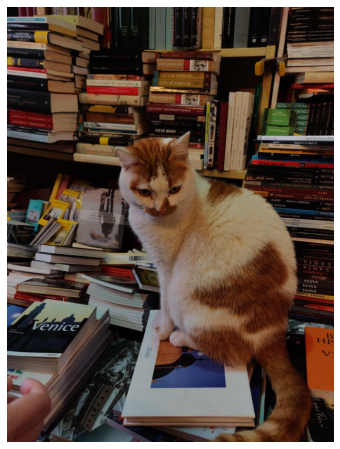

In [ ]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import torch

fig = plt.figure(figsize=(8,8))
im = io.imread("sample_data/cat.jpg")
plt.imshow(im)
plt.axis(False)

print(im.shape, im.mean(), im.std(), type(im),"\n")

The image is loaded in as a set of integer pixel values stored in an array. In fact, above our image of the cat, we can see printed values relating the statistical distribution of image's pixel values, including the mean and standard deviation of the pixel values. 

The image array has the shape 2304 x 1728 x 3, which means our image is 2304 pixels tall and 1728 pixels wide, with three pixel values located in each position relating to the RGB (Red, Green, Blue) channel values for each pixel. 

The higher the number for each RGB channel in a given pixel, the brighter the colour is in the pixel. Pixel values are given between 0-255 - a pixel with all RGB values at 255 - i.e., $[255, 255, 255]$ - is a perfectly white pixel, and a pixel with all 0 RGB values is perfectly black. $[255, 0, 0]$ corresponds to perfect red, $[0, 255, 0]$ to perfect green, and $[0, 255, 255]$ to perfect blue. There are $255^3 = 16581375$ variations of pixel RGB values in between these absolute values that describe the full human range of visible colour through RGB channel values.

### Data Augmentation in Image Data

Back to the cat - we can add noise to our image and still recognise that the animal in the image. We can add a lot of noise, actually. Let's add random gaussian noise to all RGB channels in proportion to the image's original pixel variability - measured using standard deviation:

Image pixels have a standard deviation of 52.83.


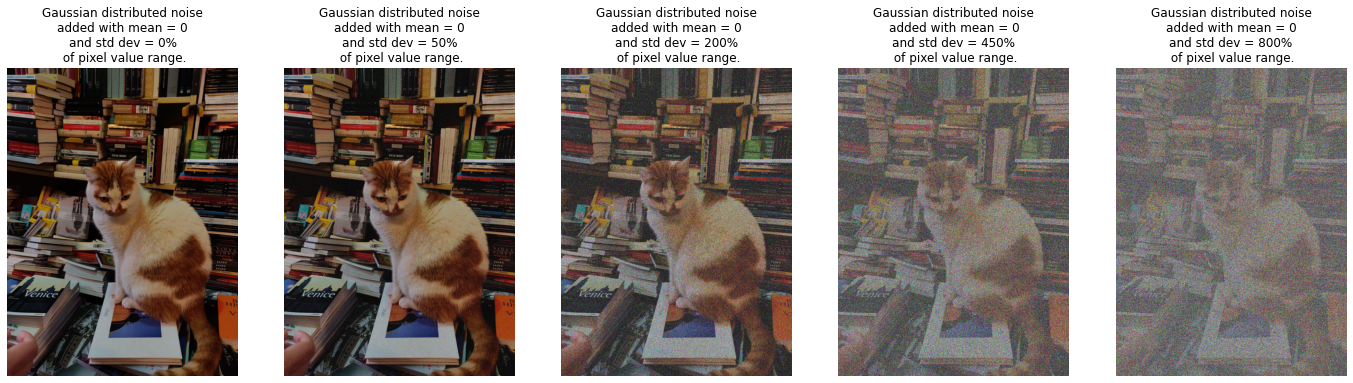

In [ ]:
import numpy as np

num_images = 5
std = im.std() # pixel variation, measured in the image array's standard deviation
print("Image pixels have a standard deviation of {:.2f}.".format(std))
noisy_images = [ np.clip(im + np.random.normal(0, i*i*std/2, size = im.shape),0,255).astype(int) for i in range(num_images)] ## here we create a list of noisy images

fig = plt.figure(figsize=(24,24))
for i,image in enumerate(noisy_images):
  plt.subplot(1,num_images,i+1)
  plt.imshow(image)
  plt.title("Gaussian distributed noise\nadded with mean = 0\nand std dev = {:.0f}%\n of pixel value range.".format(100*(i*i*std/2)/std))
  plt.axis(False)

Similarly, we can flip, rotate, and translate our image and still identify the cat in the image:

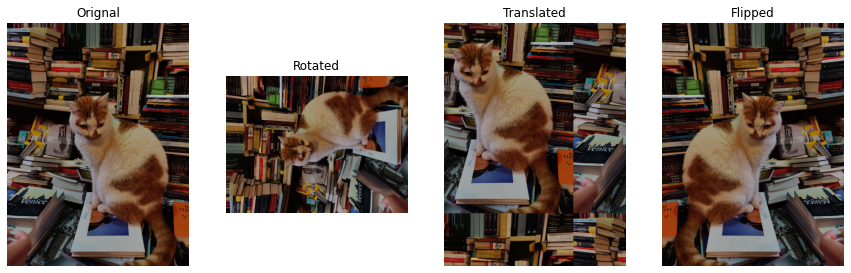

In [ ]:
rotated = np.rot90(im)
translated = np.roll(im, -500, axis=[0, 1])
flipped = np.flip(im,axis=1)
images = [im,rotated,translated,flipped]
names = ["Orignal","Rotated","Translated","Flipped"]

fig = plt.figure(figsize=(15,15))
for i,(name,image) in enumerate(zip(names,images)):
  plt.subplot(1,len(images),i+1)
  plt.imshow(image)
  plt.title(name)
  plt.axis(False)

With one image, we can communicate many images that clearly show an image of a cat. 

The purpose of this introduction is not to teach you to manipulate image data, though that is a useful skill. The aim is to communicate that data augmentation can *(and should)* be applied to *any data* format in machine learning model development *if, and only if*, you can accurately predict *unimportant variability in input data*. Data augmentation trains our classifier to recognise and ignore unimportant variation in input data and increases the size of the model's effective training dataset, improving the model's ability to detect important signals. All of these qualities improve the model's general performance on unseen data.

The less data that you have in your training dataset, and the greater your understanding of "unimportant variations" - where unimportant is defined as not changing the correct classification of input data; for images, think small translations, noise additions; rotations etc. - the more useful the introduction of data augmentation is to your model development.

<a name="2"></a>
## 2 - Neural Networks
<a name="2.1"></a>
### 2.1 Simplest Case - One Hidden Layer

Neural networks are a class of machine learning models that can perform both classification and regression. Conceptually, both of these tasks have been already been outlined in the first two tutorials; in regression, we aim to predict a continuous output, and in classification, we predict a discrete classification.

The important novelty offered by neural networks is their immense predictive power and customisability of their properties. In this tutorial, you will see that we can easily our neural networks from being able to train on a single laptop, to needing high-performance computer cluster access to run one prediction. Scaling our neural network's performance is a matter of finding the right classification/regression accuracy that justifies the model's cost to run.

To see how this happens, and how to create our own neural networks, let's introduce you to the simplest case of the neural network: the multi-layer perceptron (MLP).

### Multi-Layer Perceptron

The MLP is an extension of the multivariate regression and/or logistic algorithm. In this example, we will explain the MLP as a classification algorithm, but MLPs can be applied to regression, too.

Let us remind ourselves of the network-like structure of the logistic regression algorithm, in a problem with 3 input and 3 output variables:



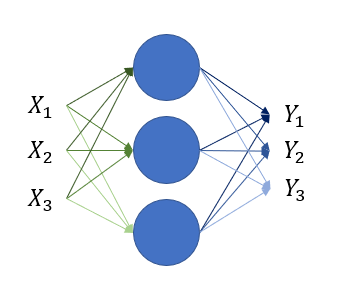

We have dropped the weights and biases from the graphical display for the purposes of clarity. What if we fed the ouput of this logistic regression algorithm into a second logistic regression algorithm, like so:

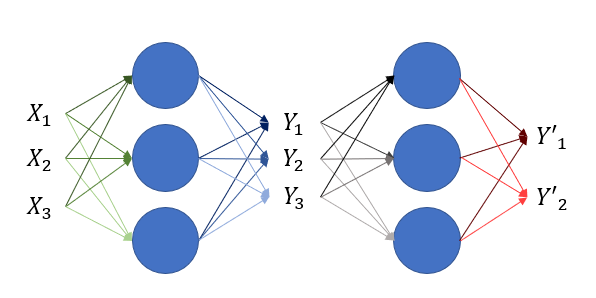

Well, our model still receives three input variables, but now it outputs two final variables, called $Y'_1, Y'_2$ and has a strange intermediary layer of variables that correspond to the first logistic regression model's ouput variables.
The whole network of nodes acts as a single classifier, that uses 3 inputs variables to predict two output variables. In this arrangement, we do not know the intermediary variable values during training - we only know the input and output data. Because we do not look at the intermediary layer's variable values, we this layer a 'hidden' layer. This is an example of the simplest possible neural network - an MLP with a single hidden layer.

Well, how does our mLP learning with this strange hidden layer arrangement? The process is still entirely dependent upon gradient descent using a loss function, but there is an extra layer of conceptual abstraction introduced by the hidden layer. Here is the process, in steps:

1. We make initial small guesses of weights and biases across all layers in the network.
2. We normalise our input data, and feed a batch into our neural network model.
3. We look at the model's output and calculate a loss in comparison to the batch's correct labels.
4. We perform gradient descent on the *final layer only*. In this arrangement, we treat $Y_1, Y_2,$ and $Y_3$ as the input variables to a logistic regression problem, treating the final layer as a linear regression model, and calculate the weight changes between it and $Y'_1, Y'_2$.
5. We work back through the layers of the neural network, training each layer similarly to a singular logistic regression model, using the following layer's corrected outputs as labels and previous layer's output as the input data.
6. Repeat 5. until all layer's have been iterated through.

Steps 5. and 6. are known as 'backpropagation', and it is the fantastic algorithm that makes training neural networks possible.

### Understanding the Neural Network's Hidden Layers in Python

To understand the purpose of having multiple layers in a neural network, we turn again to an image classification problem.

Remember - images are stored as arrays of numbers. We can therefore treat an image's pixel values as a set of input variables! We will look at the simplified case of black and white images where we dont need colour channels - our pixel values are scalar values between 0-1 that correspond to the greyscale intensity of the pixel. 0 is black, 0.5 is grey, 1 is white. Therefore, our image arrays become two dimensional. In our example, we will look at the MNIST dataset, that contains 28x28 greyscale images of handwritten digits. 

**Run the code below to load this dataset**. DO NOT WORRY ABOUT THE MEANING OF THIS CODE!

In [ ]:
import torch, torchvision

batch_size_train = 4
batch_size_test = 4

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)),
                             torchvision.transforms.Lambda(lambda x: torch.flatten(x))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,)),
                             torchvision.transforms.Lambda(lambda x: torch.flatten(x))
                             ])),
  batch_size=batch_size_test, shuffle=True)

With the handwritten digit dataset loaded in the two dataloaders above, run the code below repeatedly to see different examples of images in the dataset!

torch.Size([4, 784])
The label for this number is 1.


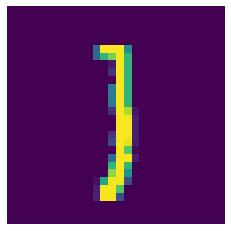

In [ ]:
import matplotlib.pyplot

images, labels = next(iter(train_loader))
print(images.shape)
im, lab = images[0],labels[0]

plt.imshow(im.numpy().reshape(28,28))
plt.axis(False)
print("The label for this number is {}.".format(lab))

The problem of classifying the the pictures of numbers above into discrete digits between 0-9 is framed as a classification problem with $28$x$28=784$ input variables and $10$ output variables.

A plane-jane logistic regression model with no hidden layers is essentially charged with learning how each specific pixels correlate with each discrete output class. As there is great variability in the location and handwriting style for all digits, the logistic regression model will struggle to find any signal in this arrangement.

This learning paradigm changes when logistic regression algorithms are stacked on top of each other. Now, instead of having to directly correlate specific pixels to specific digits, each logistic regression model that constitutes the MLP can learn abstracted intermediary patterns that can aid classification. For example, the first layer can learn to detect *edges* in the input image, as edges are simply localised regions of high-intensity pixels neighbouring low-intensity pixels. This can help in the 1-hidden-layer example, as it is easier to understand how *edges* might correlate with output digits.

But, if we abstract further and add more hidden layers, our neural network can learn to detect more abstract patterns. In the 2-hidden-layer neural network, instead of having to correlate edges to output classes, the neural network can use the $1^{st}$ hidden layer's *edges* to detect *shapes* in the $2^{nd}$ hidden layer. Digit classification in the final layer becomes even easier with shape information from the second hidden layer. 

Adding further layers, increasing the depth of the neural network, increases it's accuracy as more layers allows the model to identify increasingly abstract signals in input data. However, increasing network depth has a diminishing return on accuracy, and it incurs a linear cost increase for predictions.

Let's see how accuracy varies with network depth by training a single layer neural network (MLP), a 1-, 3-, and 5-hidden-layer neural network in the code below:

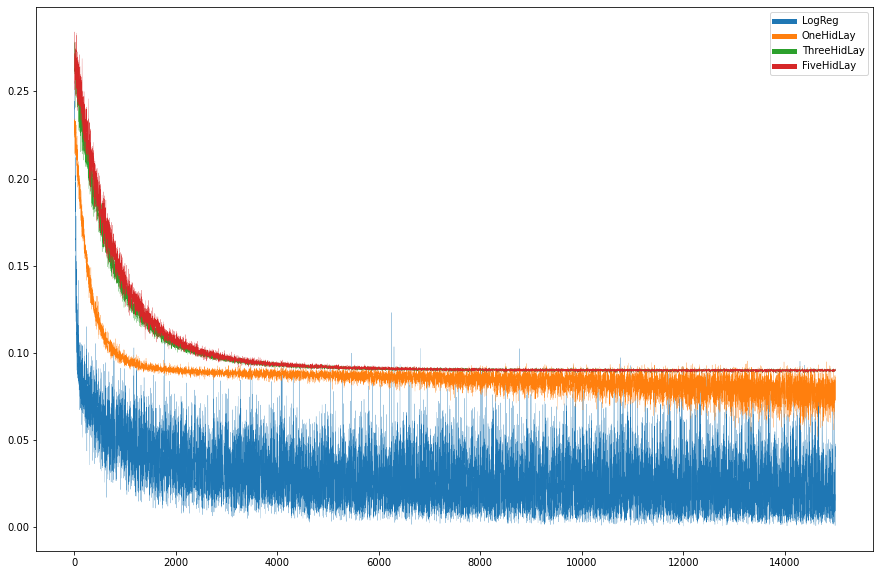

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Code our models as a set of stacked logistic regression models
LogReg = nn.Sequential( nn.Linear(784, 10), nn.Sigmoid())

OneHidLay = nn.Sequential( nn.Linear(784, 32), nn.Sigmoid(),
                           nn.Linear(32, 10), nn.Sigmoid()) ### the output of one layer must have an identical size to the input of the next layer

ThreeHidLay = nn.Sequential( nn.Linear(784, 64),nn.Sigmoid(),
                            nn.Linear(64, 32), nn.Sigmoid(),
                            nn.Linear(32, 16), nn.Sigmoid(),
                            nn.Linear(16, 10), nn.Sigmoid())

FiveHidLay = nn.Sequential( nn.Linear(784, 128), nn.Sigmoid(),
                            nn.Linear(128,128), nn.Sigmoid(),
                            nn.Linear(128, 64), nn.Sigmoid(),
                            nn.Linear(64,32), nn.Sigmoid(),
                            nn.Linear(32,16), nn.Sigmoid(),
                            nn.Linear(16, 10), nn.Sigmoid())
optim = torch.optim.SGD
## define the loss function and optimizers
models = [LogReg, OneHidLay, ThreeHidLay, FiveHidLay]
names = ["LogReg","OneHidLay","ThreeHidLay","FiveHidLay"]
loss_func = nn.MSELoss() # this is our MSE loss function 
optimisers = [optim(model.parameters(),lr=0.001,momentum=0.9) for model in models] # this is a list of our gradient descent optimiser for each model


losses = []
#this is training!!!
for x_batch, lab in train_loader: # loop the training code for as many training epochs as we desire
  loss_batch = []
  for opt,model in zip(optimisers,models):
    opt.zero_grad() #initialise the gradient descent algorithm  
    pred = model(x_batch) # predict the batch outputs using our model
    one_hot = torch.nn.functional.one_hot(lab,num_classes=10).float()    
    loss = loss_func(pred,one_hot) # calculate the loss of our predictions using the labels
    loss.backward() # calculate gradient_descent parameters
    opt.step() # change the model values using the gradient descent parameters
    loss_batch.append(float(loss)) # save the loss value to a list so we can plot the losses later
  losses.append(loss_batch)

losses = np.array(losses)

fig = plt.figure(figsize=(15,10))
plt.plot(losses,linewidth=0.2) # plot our training losses
leg = plt.legend(names)
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(5)

#### Wait a minute - why doe the logistic regression model have the lowest training loss?!

This is certainly unexpected - and is a cause for suspicion and concern. Let us evaluate the validation accuracy of each model. Run the code below to evaluate this:

In [ ]:
tp,fp,tn,fn = 0,0,0,0
#this is training!!!
for x_batch, lab in test_loader: 
  loss_batch = []
  for model in models:
    opt.zero_grad() #initialise the gradient descent algorithm
    model.eval() 
    pred = model(x_batch) # predict the batch outputs using our model
    one_hot = torch.nn.functional.one_hot(lab,num_classes=10).float()   
    for prediction,target in zip(pred,lab):
      p = prediction.item()
      t = target.item()
      if 
    loss_batch.append(float(loss)) # save the loss value to a list so we can plot the losses later
  losses.append(loss_batch)